# 엣지검출 (Edge Detection)

- 엣지(edge)
    - 배경과 물체 또는 물체와 물체간의 경계를 말한다.
- 엣지 검출
    - 엣지는 경계가 되는 부분으로 픽셀값이 급격하게 변하게 되므로 그 변화되는 픽셀들을 찾아낸다.
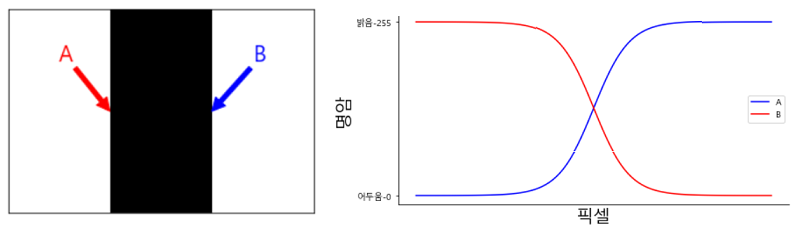
   
   - 엣지 검출을 통해 물체들의 윤곽만 남기고 필요없는 물체나 배경은 제거할 수 있다.
   - Edge detection은 noise의 영향을 많이 받아 일반적으로 blur를 수행 한 후에 Edge detection을 수행

### 엣지 검출과 미분
- 픽셀값의 차이가 큰 부분을 엣지로 판단 하므로 연속된 픽셀값에 미분을 해서 찾아낸다.  
- 그러나 영상의 픽셀값들은 특정 함수에 의해 구해진 값들이 아니므로 미분 근사값을 이용해 구해야 한다.

#### 1차 미분의 근사화
- 전진 차분(Forward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x)}{h}$
- 후진 차분(Backward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x) - f(x-h)}{h}$
- 중앙 차분(Centered difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x-h)}{2h}$
- 엣지 검출에서는 **중앙 차분**을 사용하며 **h(X의 변화)은 픽셀을 말하며** 이전 픽셀 또는 이후 픽셀과의 차이를 확인하는 것이므로 1로 볼 수 있다. 그러나 우리는 변화율을 보는 것이 목적이므로 1/2로 곱하는 것은 하지 않는다.
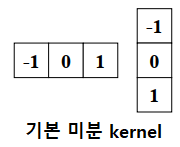

- 주요 미분 커널
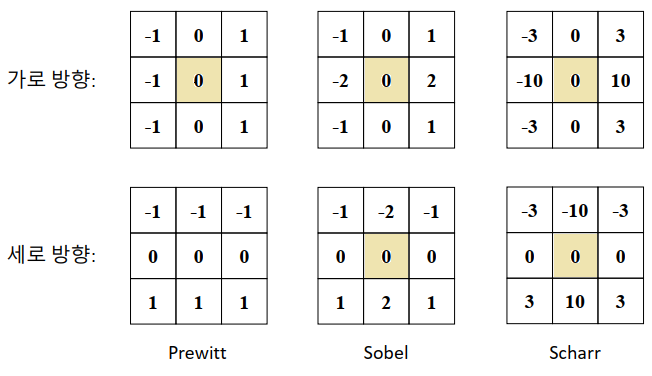

#### 소벨 필터 직접 만들어서 적용

- filter2D(입력영상, 출력영상dtype, filter행렬)
    - filter와 입력영상간의 convolution 연산을 직접 실행하는 함수

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 25

In [3]:
img = cv2.imread('images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
filter_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

filter_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# 원본 이미지에 필터를 적용(conv 연산)
sudoku_x = cv2.filter2D(img, -1, filter_x)
sudoku_y = cv2.filter2D(img, -1, filter_y)  # -1: 입력영상의 dtype과 동일한 dtype의 결과를 배열.
result = sudoku_x + sudoku_y

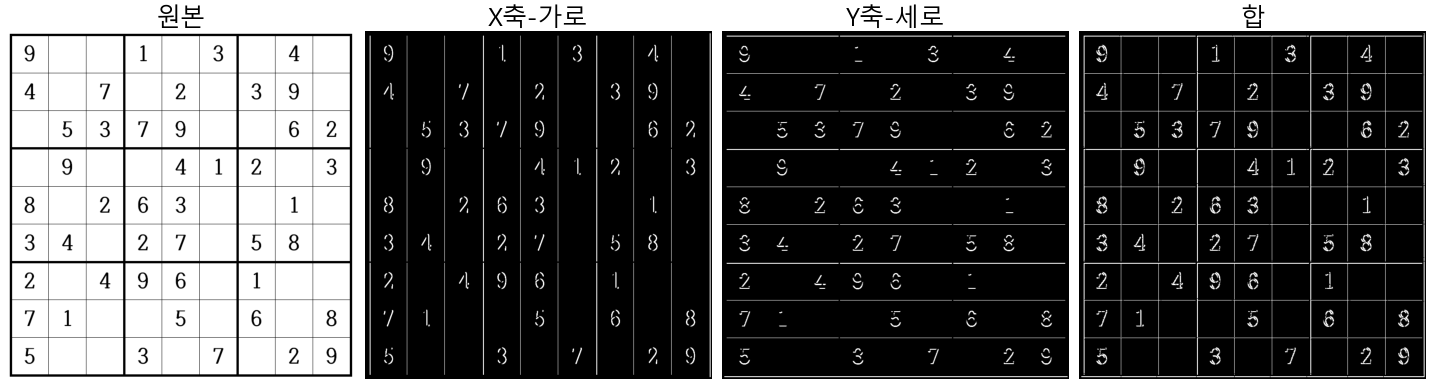

In [9]:
imgs = [img, sudoku_x, sudoku_y, result]
titles = ['원본', "X축-가로", "Y축-세로", "합"]
idx = [1,2,3,4]

plt.figure(figsize=(20,10))
for idx, sudoku, title in zip(idx, imgs, titles):
    plt.subplot(1,4,idx)
    plt.imshow(sudoku, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

### sobel 함수 이용
- **`cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta)`**
    - src: 엣지를 검출할 영상
    - ddepth: 출력 영상의 타입. -1로 지정하면 입력영상과 같은 타입 사용.
    - dx, dy: x/y 방향 미분의 차수
        - dx=1, dy=0 : 가로방향
        - dx=0, dy=1 : 세로방향
    - ksize: 커널의 크기. 보통 3으로 준다.
    - scale: 연산결과에 추가적으로 곱할값. Default: 1
    - delta: 연산결과에 추가적으로 더할값. Default: 0
- **`cv2.magnitude(x, y)`**
    - x방향, y방향 필터 결과(미분결과)를 합치는 함수
    - x: x방향 미분 결과
    - y: y방향 미분 결과

In [19]:
np.where(sobel_x>=150, sobel_x, 0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
# lenna - 컬러 이미지로 부터 엣지를 검출 하려는 경우 grayscale로 변환 후 한다.
lenna_gray = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)
# sobel_x = cv2.Sobel(lenna_gray, -1, 1, 0, ksize=3)
# sobel_y = cv2.Sobel(lenna_gray, -1, 0, 1, ksize=3)

# 대상 image타입이 uint 일 경우 Sobel() 사용히  ddepth를 float으로 해서 계산한 뒤 clip 처리를 한다.

sobel_x = cv2.Sobel(lenna_gray, cv2.CV_32F, 1, 0, ksize=3)  #cv2.CV_32F: FLOAT 32
sobel_y = cv2.Sobel(lenna_gray, cv2.CV_32F, 0, 1, ksize=3)


threshold = 100  #100이상은 남기고(255) 미만은 0으로 처리

sobel_x = np.where(sobel_x>=threshold, 255.0, 0.0)
sobel_y = np.where(sobel_y>=threshold, 255.0, 0.0)


# sobel_x = np.clip(sobel_x, 0, 255).astype(np.uint8)
# sobel_y = np.clip(sobel_y, 0, 255).astype(np.uint8)

# sobel_xy = sobel_x + sobel_y  #가로축/세로축 기준 결과 합치기
sobel_xy = cv2.magnitude(sobel_x, sobel_y) #실수타입
sobel_xy_clip = np.clip(sobel_xy, 0, 255).astype(np.uint8)


sobel_x.min(), sobel_x.max()

(0.0, 255.0)

In [27]:
lenna_gray.dtype, sobel_x.dtype

(dtype('uint8'), dtype('uint8'))

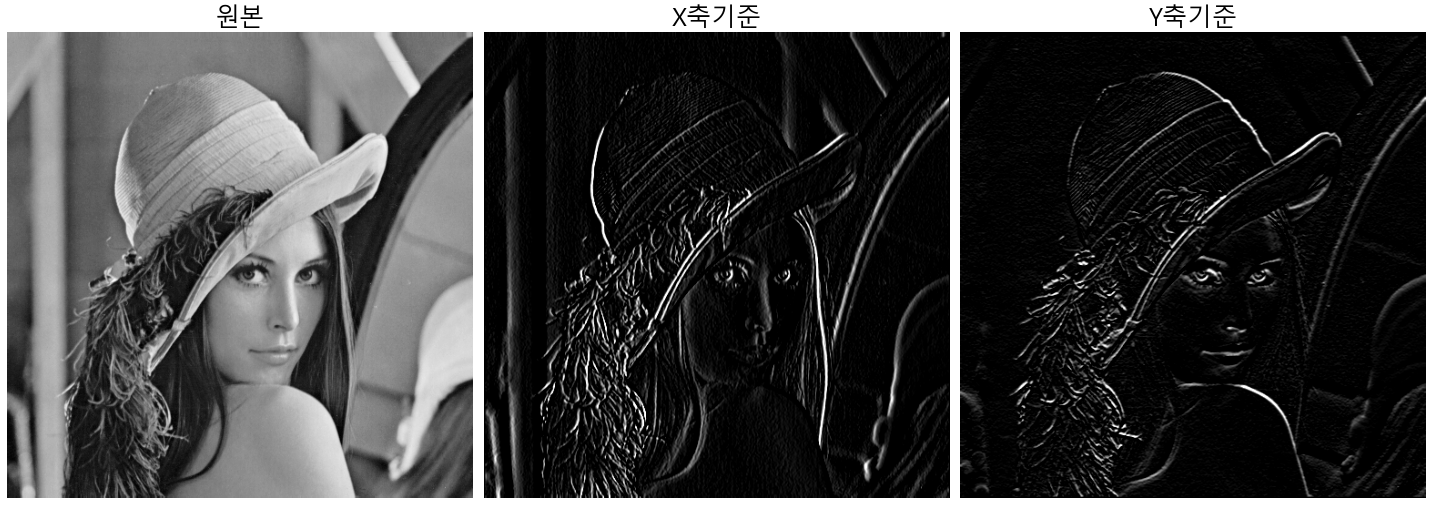

In [17]:
index = [1,2,3]
images = [lenna_gray, sobel_x, sobel_y]
titles = ['원본', "X축기준", 'Y축기준']

plt.figure(figsize=(20,10))
for idx, image, title in zip(index, images, titles):
    plt.subplot(1,3,idx)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

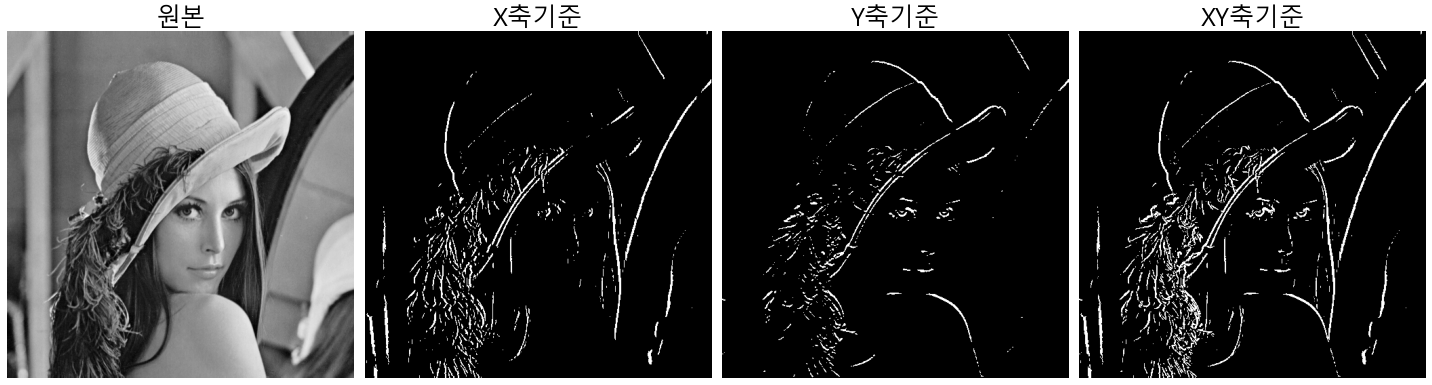

In [46]:
index = [1,2,3, 4]
images = [lenna_gray, sobel_x, sobel_y, sobel_xy_clip]
titles = ['원본', "X축기준", 'Y축기준', "XY축기준"]

plt.figure(figsize=(20,10))
for idx, image, title in zip(index, images, titles):
    plt.subplot(1,4,idx)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### Canny
- Noise에 강한 edge detection
1. Gaussian blur를 수행해 noise를 제거
2. x, y축으로 gradient 계산
3. Gradient 의 방향을 계산 후 sobel filtering
4. Non-Maximum Suppession(NMS) 수행해서 엣지가 두꺼워지는 것을 방지
    - 주위(local)에서 가장 큰 값들만 남긴다.
5. Doubling thresholding
    - low threshold, high threshold를 기준으로 값들 제거
    - low threshold 이하의 값들 제거
    - low와 high threshold 사이의 값들은 high threshold와 연결된 것만 남기고 연결 안된것은 제거
        - 약한 edge
    - high threshold 이상의 값들은 유지
        - 강한 edge
        
     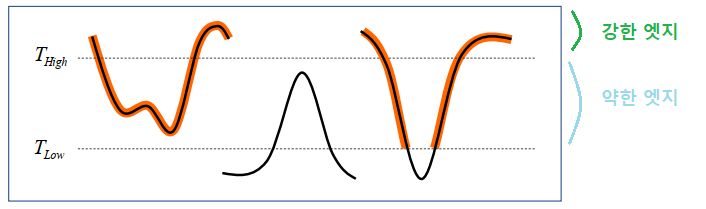

- `cv2.Canny(image, threshold1, threshold2, apertureSize=None)`
    - image: Canny 엣지 검출을 할 원본 이미지
    - threshold1: low threshold
    - threshold2: high threshold
        - threshold1과 threshold2 는 1:2 또는 1:3 정도 비율로 준다.
    - apertureSize: 소벨필터의 커널크기. default: 3

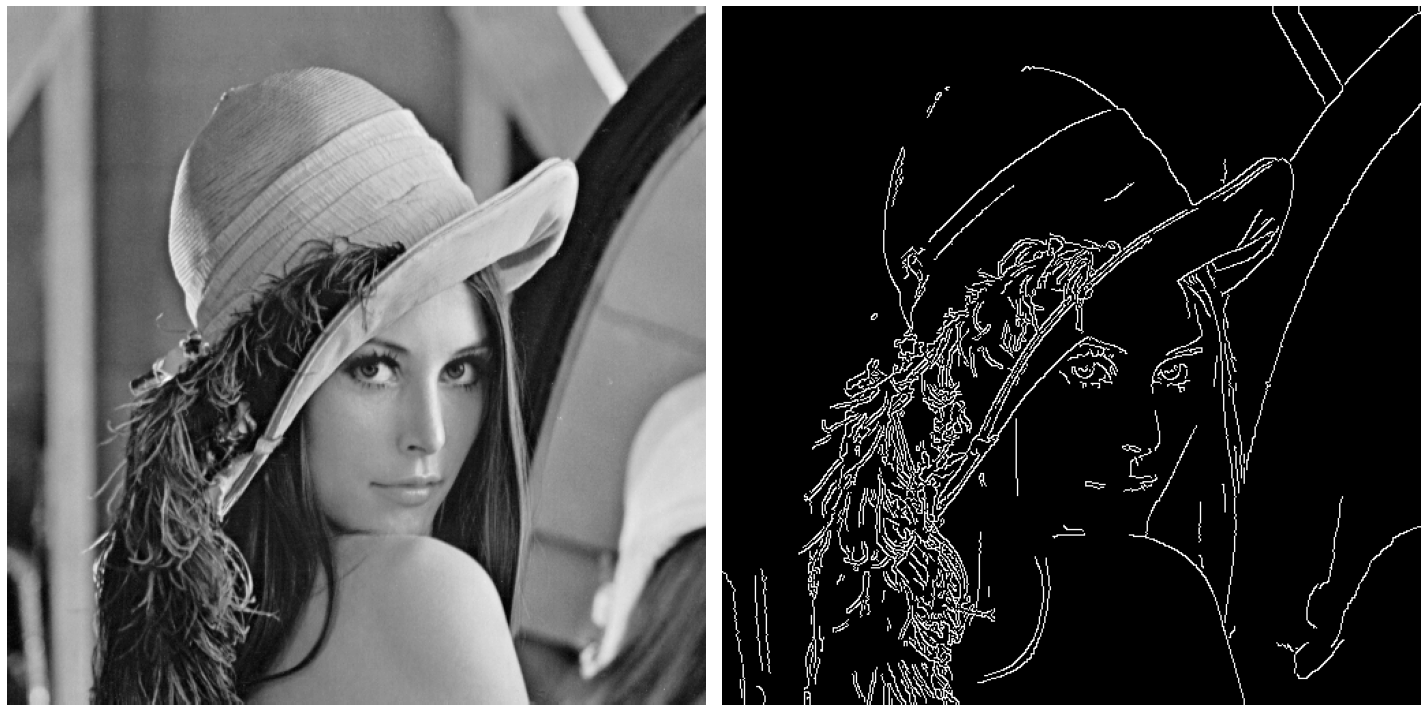

In [56]:
lenna_canny = cv2.Canny(lenna_gray, 50, 150) #(원본이미지, low TH, high TH)
    
plt.figure(figsize=(20,10))    
plt.subplot(1,2,1)
plt.imshow(lenna_gray, cmap='gray')
plt.axis('off') 

plt.subplot(1,2,2)
plt.imshow(lenna_canny, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# TODO
images/building.jpg
Canny 

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [68]:
build = cv2.imread('images/building.jpg', cv2.IMREAD_GRAYSCALE)

build_canny = cv2.Canny(build, 50,150)

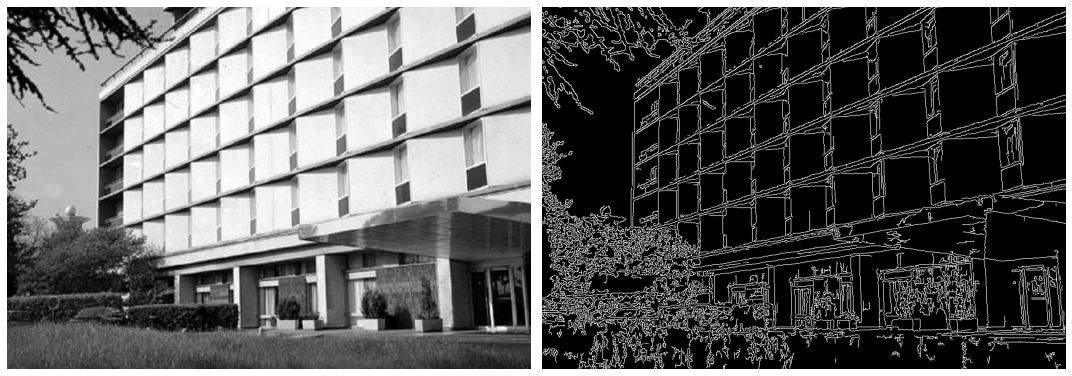

In [69]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(build, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(build_canny, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()